In [3]:
from alpaca_trade_api.rest import REST, TimeFrame
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load environment variables from .env file
load_dotenv()

api = REST()


In [4]:
# Fetching historical stock data
stock_symbol = "NVDA"
start_date = "2022-10-21"
end_date = "2023-11-20"

In [5]:
stock_data=api.get_bars("NVDA", TimeFrame.Day, start_date, end_date, adjustment='raw').df

In [ ]:
type(stock_data)

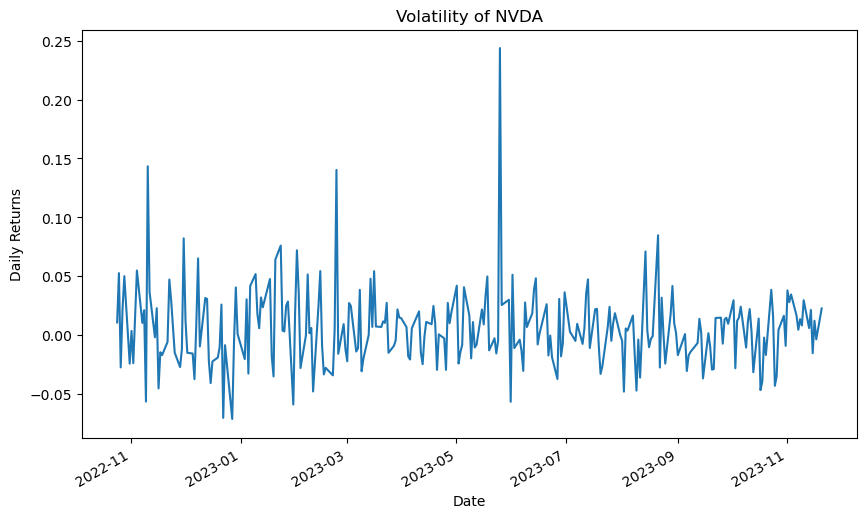

In [6]:
# Calculating daily returns
stock_data['Daily_Return'] = stock_data['close'].pct_change()

# Calculating volatility
volatility = stock_data['Daily_Return'].std() * np.sqrt(252)

# Plotting the volatility
plt.figure(figsize=(10, 6))
stock_data['Daily_Return'].plot()
plt.title(f'Volatility of {stock_symbol}')
plt.ylabel('Daily Returns')
plt.xlabel('Date')
plt.show()

/tmp/ipykernel_47482/2412274849.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if stock_data['close'][i] > stock_data['close'][i-1]:
/tmp/ipykernel_47482/2412274849.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obv.append(obv[-1] + stock_data['volume'][i])
/tmp/ipykernel_47482/2412274849.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif stock_data['close'][i] < stock_data['close'][i-1]:
/tmp/ipykernel_47482/2412274

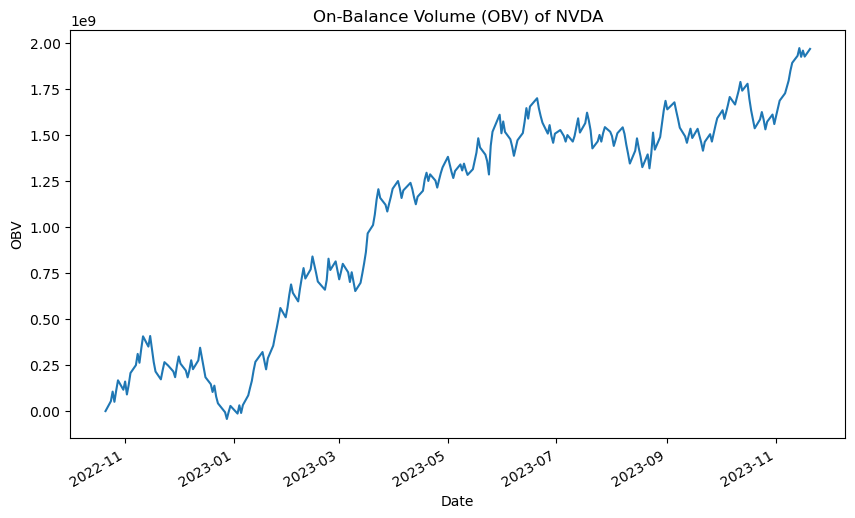

In [7]:
# Calculating the On-Balance Volume (OBV)
obv = [0]
for i in range(1, len(stock_data)):
    if stock_data['close'][i] > stock_data['close'][i-1]:
        obv.append(obv[-1] + stock_data['volume'][i])
    elif stock_data['close'][i] < stock_data['close'][i-1]:
        obv.append(obv[-1] - stock_data['volume'][i])
    else:
        obv.append(obv[-1])

stock_data['OBV'] = obv

# Plotting OBV
plt.figure(figsize=(10, 6))
stock_data['OBV'].plot()
plt.title(f'On-Balance Volume (OBV) of {stock_symbol}')
plt.ylabel('OBV')
plt.xlabel('Date')
plt.show()

In [8]:
stock_data[['OBV','close','volume']]

,OBV,close,volume
timestamp,,,
2022-10-21 04:00:00+00:00,0,124.66,63872025
2022-10-24 04:00:00+00:00,53523824,125.99,53523824
2022-10-25 04:00:00+00:00,105939713,132.61,52415889
2022-10-26 04:00:00+00:00,50572972,128.96,55366741
2022-10-27 04:00:00+00:00,112020841,131.76,61447869
...,...,...,...
2023-11-14 05:00:00+00:00,1971291439,496.56,41715786
2023-11-15 05:00:00+00:00,1923728571,488.88,47562868
2023-11-16 05:00:00+00:00,1957720988,494.80,33992417


In [9]:
def calculate_momentum(data, period=14):
 return data['close'].diff(periods=period)

# Adding Momentum to DataFrame
stock_data['Momentum'] = calculate_momentum(stock_data)

In [11]:
import pandas as pd
pd.set_option('display.max_rows', None)

In [12]:
stock_data[['close','Momentum']]

,close,Momentum
timestamp,,
2022-10-21 04:00:00+00:00,124.660,NaN
2022-10-24 04:00:00+00:00,125.990,NaN
2022-10-25 04:00:00+00:00,132.610,NaN
2022-10-26 04:00:00+00:00,128.960,NaN
2022-10-27 04:00:00+00:00,131.760,NaN
2022-10-28 04:00:00+00:00,138.340,NaN
2022-10-31 04:00:00+00:00,134.970,NaN
2022-11-01 04:00:00+00:00,135.430,NaN
2022-11-02 04:00:00+00:00,132.190,NaN
